In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd






%matplotlib notebook

In [2]:
G = nx.karate_club_graph()

In [3]:
from hcga.graphs import Graphs

graph_obj = Graphs()
graph_obj.calculate_features()



  0%|          | 0/299 [00:00<?, ?it/s]

Graph 37 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 51 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 96 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 120 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 129 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 153 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 166 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 178 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 235 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 274 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 285 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 286 is not connected. Taking largest subgraph and relabelling the nodes.
Graph 287 is not connected. Taking largest subgraph and

  2%|▏         | 7/299 [00:28<19:28,  4.00s/it]/home/robert/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/robert/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  3%|▎         | 10/299 [00:55<31:04,  6.45s/it]/home/robert/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/robert/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/robert/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/robert/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:89

In [39]:
G = graph_obj.graphs[0]
G.node[0]['feat']

array([ 11.      ,  16.362935,  40.38    ,  -2.03    ,   1.777   ,
       102.6     ,   2.      ,   7.      ,   2.      ,   6.      ,
         2.      ,   3.      ,   3.      ,   2.      ,   6.      ,
         1.      ,   8.      ,   2.      ])

/home/robert/anaconda3/lib/python3.6/site-packages/hcga/graphs.py:107: RuntimeWarning: invalid value encountered in true_divide
  X_N = X / X.max(axis=0)
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/robert/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are coll

LDA: 0.324023 (0.083405)
KNN: 0.256897 (0.166439)
CART: 0.334368 (0.133943)
NB: 0.301724 (0.183317)
SVM: 0.234138 (0.096639)


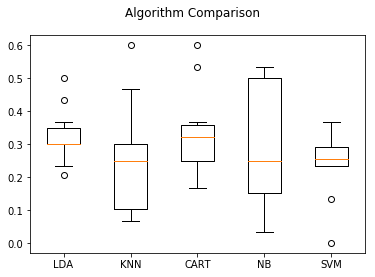

In [28]:
graph_obj.organise_feature_data()
graph_obj.normalise_feature_data()


#graph_obj.X_N[:,0]
graph_obj.graph_classification()

In [35]:
from hcga.Operations.operations import Operations

from hcga.Operations import utils
import scipy as sp


G = graph_obj.graphs[4]

op_obj = Operations(G)
#op_obj.feature_extraction()
eigenvalues= op_obj.eigenvalues
eigenvector = op_obj.eigenvectors[:,np.argmax(eigenvalues.real)]
            
        #eigenvector = eigenvectors[:,0]
        
largest = eigenvector.flatten().real
norm = sp.sign(largest.sum()) * sp.linalg.norm(largest)
eigenvector_centrality = largest / norm

#meh = np.array([1,2,3,4,5,np.nan,7,8,9])
#opt_mod,opt_mod_sse = utils.best_fit_distribution(meh,bins=20)
eigenvector_centrality


array([0.06561161, 0.06561161, 0.13377844, 0.07936989, 0.09365505,
       0.19191568, 0.07221219, 0.29397329, 0.29397329, 0.32040929,
       0.44268756, 0.33066866, 0.26962247, 0.3721718 , 0.1734576 ,
       0.1734576 , 0.19132901, 0.05734743, 0.09380051, 0.07492395,
       0.07492395, 0.04612639, 0.04612639])

In [24]:
M = nx.to_scipy_sparse_matrix(G, nodelist=list(G),dtype=float,weight=None)

eigenvalue, eigenvector = sp.sparse.linalg.eigs(M.T, k=6, which='LR',tol=0)
eigenvalue

array([4.24863709+0.j, 3.87518729+0.j, 3.71707122+0.j, 2.96134737+0.j,
       1.82707362+0.j, 1.21721304+0.j])